In [44]:
from novel_swarms.novelty.NoveltyArchive import NoveltyArchive
from novel_swarms.world.simulate import main as sim
from src.constants import SINGLE_SENSOR_HETEROGENEOUS_WORLD_CONFIG_AWARE

archive = NoveltyArchive(
    pheno_file="/home/connor/Downloads/s0/NS6/NS6_s0_t1687192704_b__1687234195.csv",
    geno_file="/home/connor/Downloads/s0/NS6/NS6_s0_t1687192704_g__1687234195.csv",
    absolute=True
)
proxy_archive = NoveltyArchive()

world_config = SINGLE_SENSOR_HETEROGENEOUS_WORLD_CONFIG_AWARE
world_config.population_size = 24
world_config.seed = 0

GENERATIONS = 100
for i in range(len(archive.archive)):
    behavior, genome = archive.archive[i], archive.genotypes[i]
    proxy_archive.addToArchive(behavior, genome)
    if i > 0 and i % GENERATIONS == 0:
        print(f"GENERATION: {i // GENERATIONS}")
        novelty_scores = []
        for j in range(GENERATIONS):
            novelty_scores.append((proxy_archive.getNovelty(15, proxy_archive.archive[-j]), len(proxy_archive.archive) - j - 1))
        novelty_scores.sort()
        print("Most Novel Scores Calculated!")
        print(novelty_scores[-3:])
        print("Ask the human about the following genomes...")

        queries = [archive.genotypes[score[1]] for score in novelty_scores[-3:]]
        for query in queries:
            world_config.agentConfig.from_n_species_controller(query)
            world_config.agentConfig.attach_world_config(world_config)
            sim(SINGLE_SENSOR_HETEROGENEOUS_WORLD_CONFIG_AWARE)


GENERATION: 1
Most Novel Scores Calculated!
[(151.0805954516688, 66), (163.68647718285345, 60), (188.26660322591414, 34)]
Ask the human about the following genomes...
[-1.          0.6         0.8         0.8        -0.4        -0.3
 -0.8         1.          0.04166667]
[<novel_swarms.config.AgentConfig.DiffDriveAgentConfig object at 0x7fba4a6b53c0>, <novel_swarms.config.AgentConfig.DiffDriveAgentConfig object at 0x7fba4a6b4d30>]
[ 0.3   -0.9    0.9    0.4    0.2    0.4   -0.9   -0.7    0.125]
[<novel_swarms.config.AgentConfig.DiffDriveAgentConfig object at 0x7fba4a6b53c0>, <novel_swarms.config.AgentConfig.DiffDriveAgentConfig object at 0x7fba4a6b4d30>]
[-0.7        -0.6        -0.2        -1.         -0.9        -0.9
 -0.4        -0.2         0.04166667]
[<novel_swarms.config.AgentConfig.DiffDriveAgentConfig object at 0x7fba4a6b53c0>, <novel_swarms.config.AgentConfig.DiffDriveAgentConfig object at 0x7fba4a6b4d30>]
GENERATION: 2
Most Novel Scores Calculated!
[(111.54171754474184, 139),

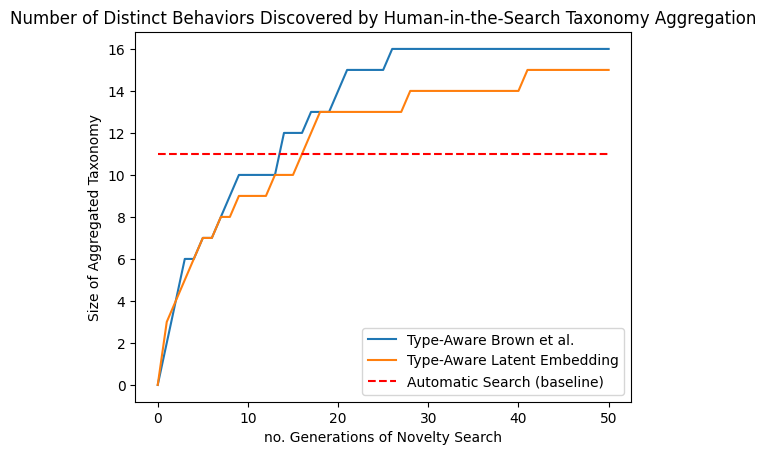

In [56]:
import matplotlib.pyplot as plt

x = [i for i in range(0, 51, 1)]
y   = [0, 2, 4, 6, 6, 7, 7, 8, 9, 10, 10, 10, 10, 10, 12, 12, 12, 13, 13, 13, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16]
y_2 = [0, 3, 4, 5, 6, 7, 7, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
y_3 = [11 for i in range(0, 51, 1)]

plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel("no. Generations of Novelty Search")
plt.ylabel("Size of Aggregated Taxonomy")
plt.title("Number of Distinct Behaviors Discovered by Human-in-the-Search Taxonomy Aggregation")
plt.plot(x, y, label="Type-Aware Brown et al.")
plt.plot(x, y_2, label="Type-Aware Latent Embedding")
plt.plot(x, y_3, 'r--', label="Automatic Search (baseline)")

plt.legend()
plt.show()

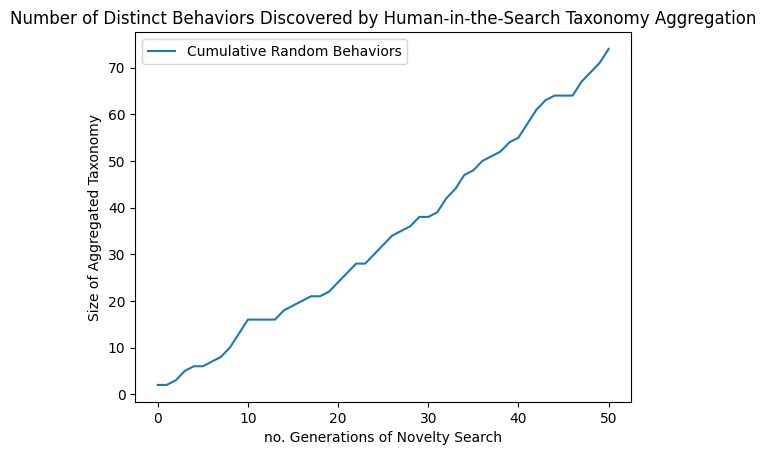

In [41]:
import matplotlib.pyplot as plt

x = [i for i in range(0, 51, 1)]
y = [2, 2, 3, 5, 6, 6, 7, 8, 10, 13, 16, 16, 16, 16, 18, 19, 20, 21, 21, 22, 24, 26, 28, 28, 30, 32, 34, 35, 36, 38, 38, 39, 42, 44, 47, 48, 50, 51, 52, 54, 55, 58, 61, 63, 64, 64, 64, 67, 69, 71, 74]

plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel("no. Generations of Novelty Search")
plt.ylabel("Size of Aggregated Taxonomy")
plt.title("Number of Distinct Behaviors Discovered by Human-in-the-Search Taxonomy Aggregation")
plt.plot(x, y, label="Cumulative Random Behaviors")

plt.legend()
plt.show()